# Principal Component Analysis

* Type of dimensionality reduction algorithm.
* Dimension reduction is used to understand which features describe the most variance in the data set.

> Dimensionality reduction algorithms create new dimensional components that are combinations of the existing features.

The main idea is to reduce the number of dimensions using PCA, then apply machine learning algorithms.

## Steps to Perform PCA

* Get data
* Calculate covariance matrix
* Calculate eigen vectors
* Sort eigen vectors by eigen values
* Choose N largest eigen values
* Project original data onto eigen vectors

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

# NumPy Implementation

In [4]:
df = pd.read_csv('~/Documents/Data Science Masterclass/DATA/cancer_tumor_data_features.csv')
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaled_X = scaler.fit_transform(df)

In [9]:
scaled_X.mean()

-6.826538293184326e-17

In [12]:
covariance_matrix = np.cov(scaled_X, rowvar=False)

In [55]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [56]:
eigen_values

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [57]:
eigen_vectors.shape

(30, 30)

In [58]:
# Till now, PC = 30.
# Choosing N Principal Components (N = 2 in this case)


In [59]:
num_components = 2

In [65]:
sorted_key = np.argsort(eigen_values)[::-1][:num_components]
sorted_key

array([0, 1])

In [66]:
eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:, sorted_key]

In [67]:
eigen_values

array([13.30499079,  5.7013746 ])

In [68]:
eigen_vectors.shape

(30, 2)

In [70]:
principal_components = np.dot(scaled_X, eigen_vectors)
# Original data is projected onto top two eigen vectors
principal_components

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [75]:
from sklearn.datasets import load_breast_cancer

In [76]:
cancer_dict = load_breast_cancer()

<AxesSubplot:>

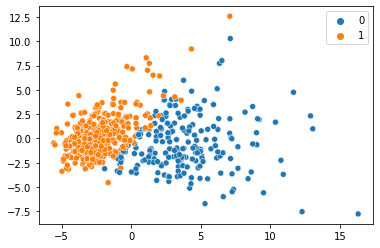

In [77]:
sbn.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=cancer_dict['target'])

# Using Sklearn

In [78]:
scaled_X = scaler.fit_transform(df)

In [79]:
from sklearn.decomposition import PCA

In [80]:
pca_model = PCA(n_components=2)

In [82]:
# Fit -> Calculate eigen values and vectors
# Transform -> Perform projection
pc_results = pca_model.fit_transform(scaled_X)

<AxesSubplot:>

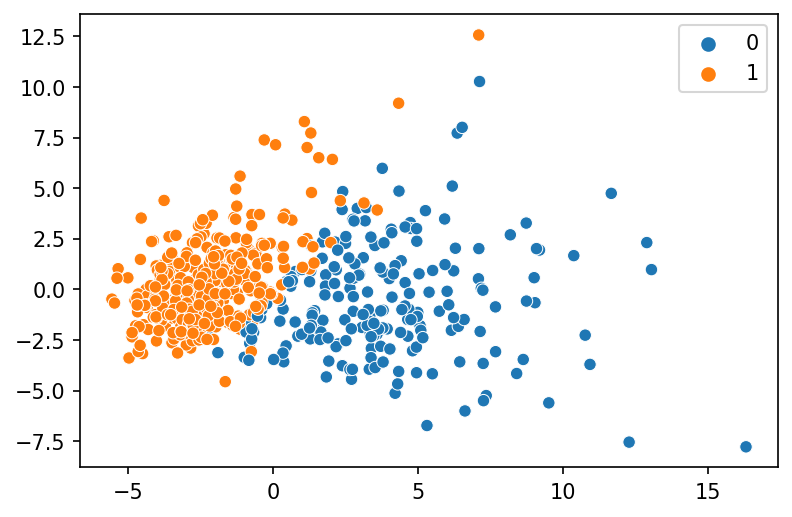

In [87]:
plt.figure(dpi=150)
sbn.scatterplot(x=pc_results[:, 0], y=pc_results[:, 1], hue=cancer_dict['target'])

In [88]:
pca_model.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [89]:
np.sum(pca_model.explained_variance_ratio_)
# Two PCs explain this much variance in the dataset

0.6324320765155947

In [90]:
explained_variance = []

for n in range(1, 30):
    
    pca_model = PCA(n_components=n)
    pca_model.fit(scaled_X)
    
    explained_variance.append(np.sum(pca_model.explained_variance_ratio_))

[Text(0.5, 0, '# of Components'), Text(0, 0.5, 'Variance explained')]

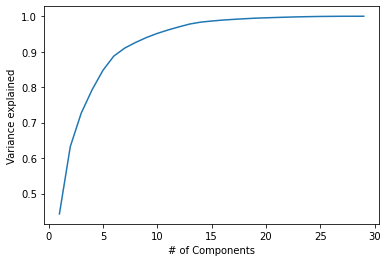

In [100]:
sbn.lineplot(x=range(1, 30), y=explained_variance).set(xlabel='# of Components', ylabel='Variance explained')
# Use this to decide the number of components